<h1 align="center">                         Mall Customer Segmentation </h1>


#Problem Statement
You own the mall and want to understand the customers like who can be easily convert [Target Customers] so that the sense can be given to marketing team and plan the strategy accordingly.

#Objective

The main objective of this project is to analyze the Mall Customer dataset using Cluster
analysis techniques to identify Segment Customers into Groups, Identify Customer Behaviors, and Support Business Decision-Making, Improve Customer Experience.

#Importing Required Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Loading and Getting a view of the Dataset**


The dataset available is in CSV format, so I will load the dataset in csv format to start data analysis

In [ ]:
#Importig Required files
df=pd.read_csv(r"/content/Mall_Customers.csv")


In [ ]:
## exploring first five variables to identify anamolies in the data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Checking the data types of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Checking the Null Values of each feature
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
# Summary of Statistics
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
print(X)

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


In [ ]:
# Checking the shape of the dataset
X.shape

(200, 3)

# **Elbow Method**

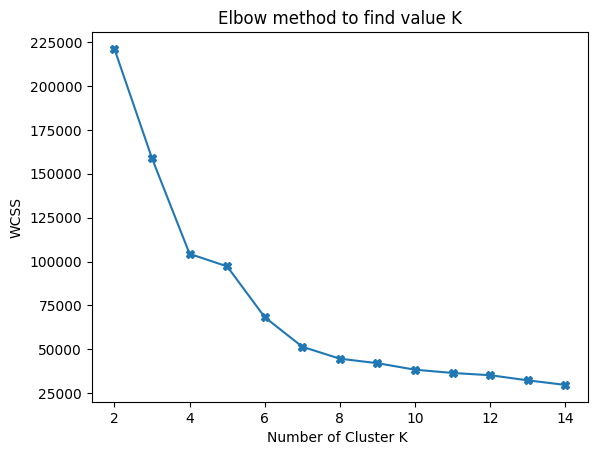

In [ ]:
#Finding the best K value
wcss=[]
for K in range(2,15):
  kmeans=KMeans(n_clusters=K, random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(2,15),wcss,marker='X')
plt.xlabel("Number of Cluster K ")
plt.ylabel('WCSS')
plt.title("Elbow method to find value K")
plt.show()

In [ ]:
#Train the Model
kmeans=KMeans(n_clusters=6,random_state=42)
kmeans.fit(X)


KMeans(n_clusters=6, random_state=42)

In [ ]:
#create a New Column for clusters
df['labels']=kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
0,1,Male,19,15,39,5
1,2,Male,21,15,81,2
2,3,Female,20,16,6,5
3,4,Female,23,16,77,2
4,5,Female,31,17,40,5


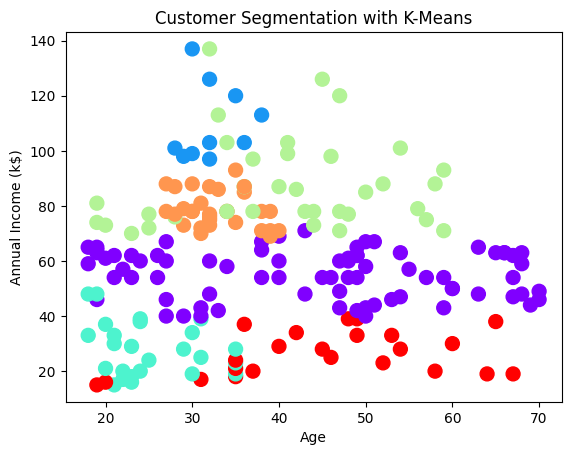

In [ ]:
#K-Means algorithm has grouped customers into five distinct segments based on their Age and Annual income

plt.scatter(df["Age"], df["Annual Income (k$)"], c=df["labels"], cmap="rainbow", s=100)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.title("Customer Segmentation with K-Means")
plt.show()

# **Segment Analysis**

# Purple Cluster (Center): The Average Customer

This is a large and diverse group with mid-range annual incomes (approximately $40k - $70k) spanning a very wide age range (from under 20 to 70). They represent the general or average customer base.


# Red Cluster (Bottom Right): Older, Low Income
This segment consists of customers across a wide age range (approx. 35-70) but with low annual incomes (generally below $40k).

#Turquoise Cluster (Bottom Left): Young, Low Income

This group is characterized by younger customers (primarily under 35) who also have low annual incomes (below $40k). This could represent students or young professionals early in their careers.


#Orange Cluster (Top-Center Left): Young, High Earners
These customers are relatively young to middle-aged (approx. 28-40) and have high annual incomes (approx. $70k - $100k). This is a financially strong demographic.

#Light Green Cluster (Top): Prime Earners
This segment has the highest annual incomes (from 70k  up to nearly $140k) and consists of customers in their prime earning years (approx. 30-60).

In [ ]:
#Indentify the Minimum and maximum Annual Income and Spending Score
df.groupby("labels").agg({'Annual Income (k$)':['min','max','mean'],'Spending Score (1-100)':['min','max','mean']}).reset_index()


labels Annual Income (k$)                  Spending Score (1-100)      \
                        min  max        mean                    min max   
0      0                 40   71   55.210526                     35  60   
1      1                 97  137  109.700000                     68  97   
2      2                 15   48   28.040000                     59  99   
3      3                 70  137   87.432432                      1  40   
4      4                 69   93   78.551724                     63  97   
5      5                 15   39   26.304348                      3  40   

              
        mean  
0  49.447368  
1  82.000000  
2  77.000000  
3  18.189189  
4  82.172414  
5  20.913043

# **Age Vs Spending Score**


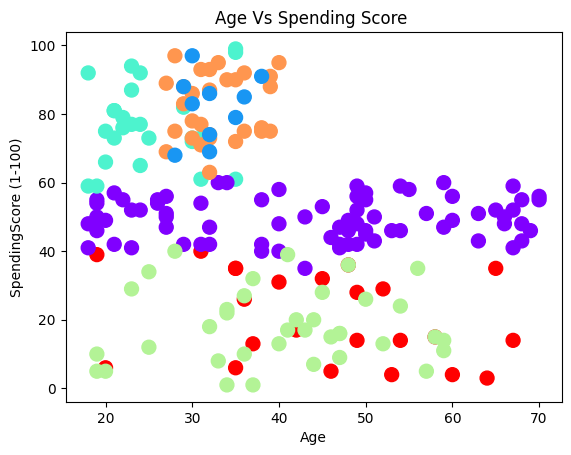

In [ ]:
#This graph segments customers into five distinct groups based on their age and spending score, revealing clear patterns in consumer behavior.

plt.scatter(df['Age'],df['Spending Score (1-100)'],c=df['labels'],cmap='rainbow',s=100)
plt.xlabel('Age')
plt.ylabel('SpendingScore (1-100)')
plt.title('Age Vs Spending Score ')
plt.show()


**Segment Analysis**

# Turquoise & Orange Clusters (Top): The Target Audience

This group consists of younger customers (approximately 20-40 years old) with the highest spending scores (60-100). They are likely the primary target for most marketing campaigns due to their high willingness to spend.

# Purple Cluster (Middle): The Standard Customer

This is a large segment of customers with average spending scores (40-60) that spans all age groups. They are consistent but moderate spenders.

# Red & Light Green Clusters (Bottom): The Careful Spender

This segment includes customers of all ages who have a low spending score (0-40). They are either cautious with their money, have lower disposable income, or are simply not frequent shoppers.



# **Annual Income Vs Spending Score**

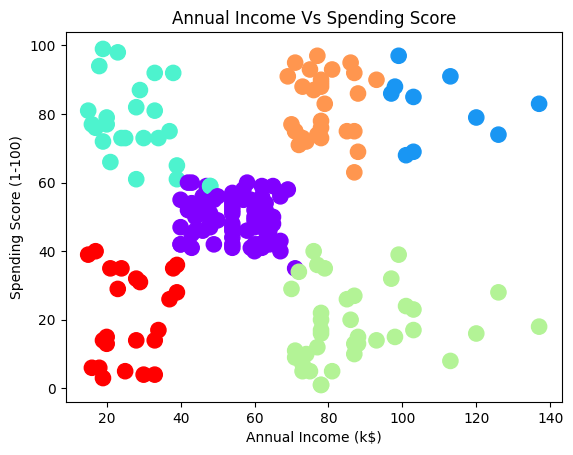

In [ ]:

plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"],c=df["labels"],cmap='rainbow',s=120)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income Vs Spending Score")
plt.show()











#Segment Analysis


# Orange Cluster (Top Right): The Target Audience

 **Characteristics**: High Annual Income and High Spending Score.

**Interpretation:** This is the ideal customer segment. They have both the financial capacity and the willingness to spend. Businesses should target this group with premium products and loyalty programs.


#Purple Cluster (Center): The Average Customer

**Characteristics:** Average Annual Income and Average Spending Score.

**Interpretation:** This group represents the sensible, middle-of-the-road customers. They are a stable source of revenue but may be more price-sensitive than the target group.


#Light Green Cluster (Bottom Right): The Savers

**Characteristics:** High Annual Income but a Low Spending Score.

**Interpretation:** These customers earn a lot but are frugal and cautious with their money. They prioritize saving over spending. Marketing to this group is challenging and would require a focus on value, quality, and long-term benefits rather than luxury or impulse buys.


#Red Cluster (Bottom Left): The Careful Spenders

**Characteristics:** Low Annual Income and a Low Spending Score.

**Interpretation:** This group has limited purchasing power and spends very cautiously. They are best targeted with discounts, sales, and essential or value-oriented products.


#Turquoise Cluster (Top Left): The High-Risk Spenders

**Characteristics:** Low Annual Income but a High Spending Score.

**Interpretation:** This is a fascinating group. Despite not earning much, they spend a lot. This could be younger individuals with fewer financial responsibilities or customers who are potentially spending on credit. While they are active spenders, their financial situation might make them a riskier target for high-value credit-based products.

# **Conclusion**

The insights from this project can help mall management and marketers

1.**Personalize marketing strategies** for each customer segment.

2.Improve customer retention by **offering relevant promotions**.

3.**Optimize resource allocation** by focusing efforts on profitable segments.

4.**Enhance overall customer satisfaction** through targeted engagement.








  # **For My Point of View**

From a machine learning perspective, this project demonstrates the practical use of unsupervised learning in solving real-world business problems. It showcases how clustering can transform raw customer data into actionable insights that directly support data-driven decision-making in retail and marketing.